In [1]:
# Find centroids of the signal clusters. There is a given dataset
# of signals without noise. Each signal represents one of the 64 alphabet letters,
# coded by 2^6. The signals are scaled and shifted with two parameters
# (scale, shift) fitting the unknown centroids. The parameters are returned by the
# self-regression model.
# Sun, Feb 2, 2025

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import json
from google.colab import drive
drive.mount('/content/drive')
f_path = '/content/drive/MyDrive/AlohaCollisionDetector'
# import sys
# sys.path.insert(0,f_path)
#%ls

DEMO_PLTn = 3 # Plot first figures in demo mode, otherwise set +inf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
f_prefx = '/data/inphase_quadrature_'
with open(f_path + f_prefx + 'data.json') as f:
  data = np.array(json.load(f))
with open(f_path + f_prefx + 'noise.json') as f:
  noise = np.array(json.load(f))
# Read the library files with centroids
iqdata = data[:,0,:] + 1j*data[:,1,:]
iqnoise = noise[:,0,:] + 1j*noise[:,1,:]
# Fill the library with centroids

In [4]:
# The discovered centroids and clusters
idx_centroids = {769, 514, 5, 522, 12, 536, 792, 28, 796, 288, 291, 40, 41, 828, 324, 327, 843, 588, 595, 852, 342, 601, 859, 354, 360, 617, 877, 109, 629, 891, 380, 639, 385, 903, 648, 652, 914, 918, 919, 408, 158, 160, 929, 940, 173, 689, 690, 434, 956, 445, 962, 457, 970, 458, 974, 208, 469, 984, 217, 731, 484, 483, 496, 761}
idx_clusters = {(762, 647, 7, 169, 794, 331, 886, 183, 538, 859), (195, 612, 133, 325, 40, 136, 733, 171, 844, 936, 494, 463, 439, 88, 985, 955, 189, 734), (385, 738, 840, 112, 146, 530, 831), (224, 800, 5, 281, 517, 711, 9, 586, 842, 535, 152, 121, 862), (777, 267, 664, 555, 815, 566, 185, 698, 709, 837, 456, 594, 731, 860, 606, 996, 358, 619, 627), (514, 645, 775, 264, 265, 393, 520, 791, 413, 286, 543, 38, 294, 309, 949, 316, 318, 726, 987, 997, 511), (471, 578, 681, 28, 527, 498, 403, 468, 277, 245, 438, 377, 220, 319), (577, 865, 259, 452, 389, 361, 969, 523, 273, 595, 767, 952, 797, 191), (321, 162, 994, 356, 774, 295, 491, 269, 909, 368, 785, 434, 499, 881), (672, 100, 613, 932, 71, 487, 970, 303, 274, 658, 729), (384, 352, 552, 876, 973, 696, 728, 766, 692, 820, 792, 61, 30, 447), (513, 398, 787, 409, 921, 174, 433, 563, 53, 450, 454, 332, 591, 83, 485, 877, 878, 892, 637, 254, 383), (802, 771, 901, 744, 600, 683, 461, 366, 976, 529, 338, 536, 890, 700, 829, 510, 415), (386, 29, 35, 678, 42, 568, 317, 832, 327, 713, 216, 990, 350, 223, 353, 102, 753, 246, 247), (963, 682, 107, 251, 655, 50, 984, 187), (544, 928, 34, 549, 679, 967, 459, 588, 972, 814, 855, 80, 951, 818, 308, 663, 57), (65, 741, 262, 614, 235, 587, 748, 430, 558, 114, 179, 978, 918, 151, 694, 506, 95), (993, 515, 231, 810, 906, 782, 175, 560, 783, 210, 371, 853, 182, 375, 636, 445), (641, 905, 525, 142, 147, 659, 427, 428, 812, 305, 823, 184, 314, 571, 194, 581, 843, 854, 215, 605, 868, 364, 751, 382), (899, 67, 44, 78, 703, 84, 666, 891, 285, 287), (609, 418, 930, 518, 712, 590, 654, 910, 948, 373, 917, 408, 249, 953, 988, 893, 894), (354, 706, 132, 451, 137, 10, 299, 938, 334, 888, 633, 186, 155, 607), (387, 400, 21, 407, 291, 807, 553, 178, 306, 59, 63, 82, 470, 856, 94, 228, 374, 889, 124), (288, 481, 98, 992, 36, 838, 871, 424, 302, 432, 592, 691, 924), (394, 279, 923, 806, 935, 688, 188, 958, 960, 458, 718, 977, 339, 85, 597, 347, 242, 634, 127), (737, 37, 550, 455, 202, 460, 653, 749, 781, 49, 379, 276, 437, 983, 158, 765, 222, 763), (1, 97, 324, 968, 201, 149, 213, 981, 539), (3, 422, 839, 72, 939, 473, 14, 48, 466, 819, 55, 217, 764), (225, 257, 995, 134, 742, 870, 173, 975, 528, 278, 758, 24, 346, 60, 799), (675, 292, 869, 599, 359, 8, 232, 297, 426, 908, 813, 965, 982, 572, 476, 828, 509, 62), (256, 322, 453, 329, 496, 848, 370, 340, 148, 312, 478), (611, 70, 326, 616, 234, 492, 205, 46, 493, 752, 52, 405, 150, 825, 601, 827, 93), (416, 768, 962, 548, 168, 618, 811, 301, 141, 944, 884, 280, 477), (545, 580, 484, 646, 39, 746, 238, 367, 850, 501, 214, 760, 25), (128, 769, 803, 101, 841, 524, 333, 465, 497, 562, 979, 502, 695, 313, 858, 735), (954, 673, 804, 166, 583, 330, 76, 686, 623, 942, 113, 690, 337, 22, 603, 123, 444, 830), (576, 33, 522, 650, 778, 621, 143, 207, 79, 879, 851, 436, 701), (320, 864, 872, 617, 395, 13, 847, 402, 883, 467, 822, 727, 344, 732, 159), (448, 801, 129, 643, 391, 488, 846, 912, 18, 786, 629), (770, 4, 135, 903, 780, 915, 153, 420, 165, 934, 561, 817, 323, 198, 722, 212, 863, 482, 227, 610, 486, 250, 252), (66, 933, 103, 907, 429, 239, 208, 431, 495, 117, 697, 604, 638), (260, 138, 284, 163, 676, 554, 689, 945, 565, 311, 569, 699, 574, 836, 69, 966, 596, 89, 475, 348, 230), (674, 805, 551, 635, 92, 882, 946, 947, 857, 505, 315, 956, 31), (704, 705, 644, 648, 585, 298, 362, 620, 808, 111, 310, 56, 218, 446), (897, 99, 388, 197, 998, 392, 170, 779, 300, 206, 719, 625, 757, 761, 157), (736, 419, 104, 649, 266, 714, 652, 268, 180, 500, 125, 479), (6, 200, 759, 236, 557, 219, 15, 684, 880, 20, 181, 54, 919, 661, 91, 540, 989), (423, 904, 73, 489, 75, 490, 575, 845, 47, 875, 925, 914, 341, 118, 885, 26, 349, 255), (773, 12, 531, 662, 920, 793, 154, 425, 570, 74, 725, 86, 343, 986, 233, 241, 116, 507, 895), (512, 866, 390, 77, 974, 685, 464, 657, 717, 435, 564, 849, 980, 602), (226, 357, 122, 105, 140, 622, 784, 537, 90, 380, 927), (480, 640, 258, 642, 964, 261, 263, 556, 943, 469, 821, 665, 442, 826, 670), (651, 795, 411, 931, 164, 172, 559, 304, 307, 441, 589, 336, 342, 867, 503, 743, 756, 887, 378), (32, 929, 417, 833, 521, 937, 81, 145, 51, 721, 693, 755, 87, 351), (160, 64, 96, 516, 421, 708, 584, 106, 365, 526, 941, 816, 209, 913, 27, 156, 957), (192, 290, 483, 582, 199, 472, 874, 144, 176, 401, 926, 950, 23, 632, 922, 508, 542, 991), (0, 130, 900, 519, 911, 275, 660, 916, 790, 796, 669, 546, 567, 58, 193, 971, 248, 615, 240, 754, 504), (902, 776, 404, 533, 667, 798, 161, 547, 293, 702, 457, 593, 608, 229, 363, 237, 750, 630, 631), (898, 399, 272, 656, 852, 372, 598, 120, 730, 412, 671), (396, 397, 788, 410, 45, 440, 573, 961, 707, 196, 710, 715, 462, 720, 861, 221, 355, 360, 244, 376), (131, 68, 677, 680, 745, 108, 270, 335, 16, 19, 723, 443, 190, 639), (896, 2, 17, 532, 534, 406, 959, 579, 204, 345, 999, 747, 109, 110, 369, 626, 628, 253, 126), (289, 328, 809, 873, 43, 940, 271, 624, 474, 115, 789, 119, 282, 283, 668, 541, 414), (449, 739, 740, 772, 167, 41, 11, 139, 203, 716, 687, 177, 211, 243, 381)}
iqlib = iqdata[list(idx_centroids)]

In [5]:
# from plots import plt_compare_vec, plt_cluster
# from functions import find_lsq_shift, shift_x, scale_x2max
# These functions are embedded here for Colab version

In [6]:
# @title
# * Collection of functions for I/D data signal processing
# The singal dtype=complex
import numpy as np

def shift_x(x, shift):
  # Shift a vector to several positions, replacing the gap with zeroes
  if shift < 0:
    sft_x = np.pad(x[:len(x) + shift], (abs(shift), 0), 'constant', constant_values=0)
  else:
    sft_x = np.pad(x[shift:], (0, shift), 'constant', constant_values=0)
  return sft_x

from scipy.linalg import lstsq
def find_lsq_shift_exhaust(x, y, N):
  # Semor, two-pametric (scale, shift) self-modeling regression
  # Find the best phase of the scaled y to minimize the distance to x
  # N is the maximum allowed phase shift in either direction
  # Works for complex-valued vectors
  # Returns original shifted y, shift of x and scale of x
  err_min = float('inf')
  best_shift = 0

  # The shifting subfunction puts zeroes to the both ends of the signal
  def shift_it(y, len_x, shift):
    if shift < 0:
      shifted_y = np.pad(y[:len_x + shift], (abs(shift), 0), 'constant', constant_values=0)
    else:
      shifted_y = np.pad(y[shift:], (0, shift), 'constant', constant_values=0)
    return shifted_y

  # Scale y according to x and return the distance
  def lsq_xy(x, y):
    b, err, rank, s = lstsq(np.column_stack([x]), y)
    return b[0], err # Distance and scaled (and shifted)

  len_x = len(x)
  # Exhaustive search for +- N
  for shift in range(-N, N + 1):
    shifted_y = shift_it(y, len_x, shift)
    b0, err_0 = lsq_xy(x, shifted_y) # Currest distance
    # print('Shift', shift * shift_dir, 'Err', err_0, 'min', err_min)
    if err_0 < err_min:
      err_min = err_0
      best_b0 = b0
      best_shift = shift
  return err_min, best_b0, -1 * best_shift

def scale_x2max(x, amp = 1 + 1j):
  # The expected amplitude of the iqdata is between 0.3 and 1.2 V. Set amp to 1 V
  # Works with dtype=complex
  if np.all(x == 0):
        raise ValueError("Scaling is impossible for a zero vector x.")
  z = np.zeros(len(x), dtype=complex)
  z.real = amp.real * x.real / np.max(np.abs(x.real))
  z.imag = amp.imag * x.imag / np.max(np.abs(x.imag))
  return z

# ** Distance functions
#def dist_xy(x,y):
  # Works with dtype=complex
  # TODO remove this function due to it is obvious
#  return np.linalg.norm(x - y)

# * Collection of plot functions for the I/Q data signal visualization
# The singal dtype=complex
import matplotlib.pyplot as plt
import numpy as np

# ** Plot (single plot) a couple of signals as vectors and a couple of signals from a matrix
def plt_compare_vec(x, y, xlabel = 'First', ylabel = 'Second'): # X and X1 must be of the same shape
  #indices = np.random.choice(len(X), n, replace=False)# [0] # Pick an item
  #for index in indices:
  plt.plot(x.real, label = 'First, real', linestyle='dashed')
  plt.plot(x.imag, label = 'First, imaginary', linestyle='dashed')
  plt.plot(y.real, label = 'Second, reeal')
  plt.plot(y.imag, label = 'Second, imaginary')
  plt.rcParams['font.family'] = 'DejaVu Serif'
  plt.rcParams['lines.linewidth'] = 2
  #plt.rcParams['lines.markersize'] = 12
  plt.rcParams['xtick.labelsize'] = 12#24
  plt.rcParams['ytick.labelsize'] = 12#24
  plt.rcParams['legend.fontsize'] = 12#24
  plt.rcParams['axes.labelsize'] = 10#24
  plt.xlabel('Time ticks', fontname='DejaVu Serif')
  plt.ylabel('Amplitude, V', fontname='DejaVu Serif')
  plt.legend()
  plt.show()
  return

# ** Plot (separated real, imaginary plot) all signals a the matrix as a cluster
def plt_cluster(X, idx): # X and X1 must be of the same shape
  #indices = np.random.choice(len(X), n, replace=False)# [0] # Pick an item
  #plt.rcParams['text.usetex'] = True
  plt.rcParams['font.family'] = 'DejaVu Serif'
  plt.rcParams['lines.linewidth'] = 2
  #plt.rcParams['lines.markersize'] = 12
  plt.rcParams['xtick.labelsize'] = 12#24
  plt.rcParams['ytick.labelsize'] = 12#24
  plt.rcParams['legend.fontsize'] = 12#24
  plt.rcParams['axes.labelsize'] = 10#24
  for i in idx:
    plt.plot(X.real[i], label = str(i))#, linestyle='dashed')
  plt.ylabel('Amplitude, V (real)', fontname='DejaVu Serif')
  plt.xlabel('Time ticks', fontname='DejaVu Serif')
  plt.legend()
  plt.show()
  for i in idx:
    plt.plot(X.imag[i], label = str(i))#, linestyle='dashed')
    plt.ylabel('Amplitude, V (imaginary)', fontname='DejaVu Serif')
    plt.xlabel('Time ticks', fontname='DejaVu Serif')
    plt.legend()
  plt.show()
  return


These signals belong to the same cluster


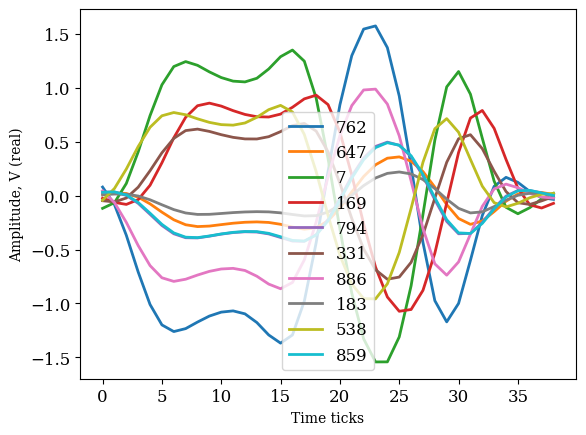

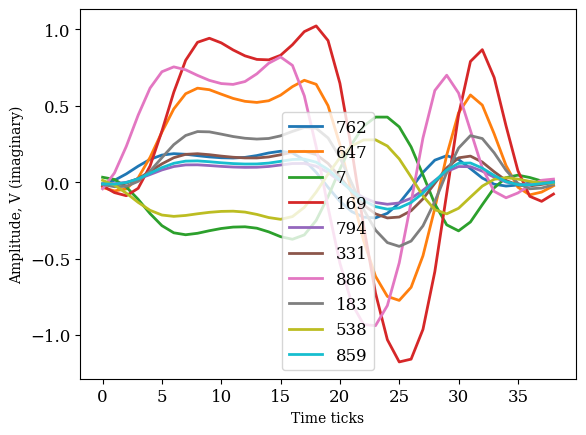

In [7]:
# Plot the expected result: an example of a cluster
#plt_compare_vec(iqdata[0], iqdata[1])
print('These signals belong to the same cluster')
plt_cluster(iqdata, list(next(iter(idx_clusters))))

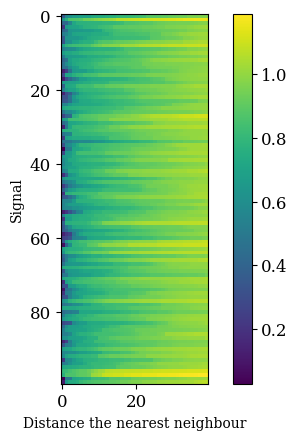

In [8]:
# Find the pairwise distance between the signals before clustering

# Normalize the energy of the signal to the cluster.
n = len(iqdata)

# Show the distance between I/Q data signals
iqdata_norm  = np.empty(iqdata.shape, dtype=complex)
for x, i in zip(iqdata, range(n)):
  iqdata_norm[i] = x / np.sqrt(np.sum(np.abs(x)**2))

# Make the (n,n)-pairwise distance matrix
dist = np.empty((n, n))
for x, i in zip(iqdata_norm, range(n)):
  for y, j in zip(iqdata_norm, range(n)):
    dist[i, j] = np.linalg.norm(x - y)

# Plot the distance matrix to recognize the number of the neighbors of each signal
dist_sorted = np.sort(dist, axis=1)
# print(dist_sorted[:,0]) # The first column
dist_sorted = np.delete(dist_sorted, 0, axis=1) # Delete the 1st row with self-distance zeros
# Plot some part oif this matrtix
plt.imshow(dist_sorted[:100,:40], cmap="viridis", interpolation="nearest")
plt.xlabel('Distance the nearest neighbour', fontname='DejaVu Serif')
plt.ylabel('Signal', fontname='DejaVu Serif')
plt.colorbar()
plt.show()
# Distance visualization
# Plot the same matrix as a collection of histograms
# for i in range(210,213):
#  d = dist_sorted[i,:4]
#  plt.bar(range(len(d)), d)
#  plt.show()
# Show some neighbours
# ref_idx = 695 # 210 # 636 # 213 #
# idx = np.argsort(dist[ref_idx,:]) # Sort neighbours along the row
# print(idx)
# plt_compare(iqdata_norm, ref_idx, idx[7]) # idx[0] is self, idx[1] is the closest
# x1 = iqdata[ref_idx]
# x2 = iqdata[idx[2]]

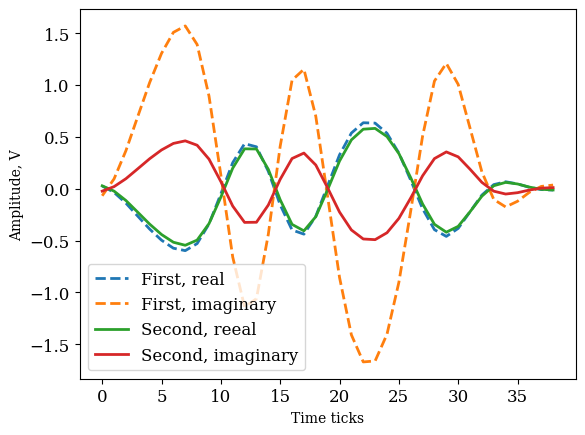

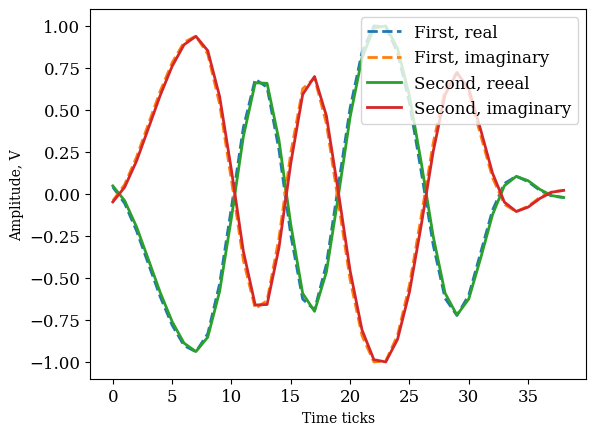

In [9]:
# Scale the signal amplitude to abs[0,1] Volts
# Plot before and after normalizing
plt_compare_vec(iqdata[695], iqdata[101])
plt_compare_vec(scale_x2max(iqdata[695]), scale_x2max(iqdata[101]))


Scale = (0.17976032543105436+0.40268563327545276j) Shift = -4
Before shift


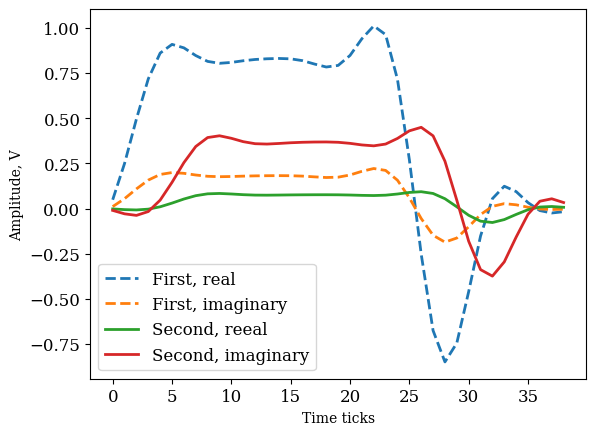

After shift


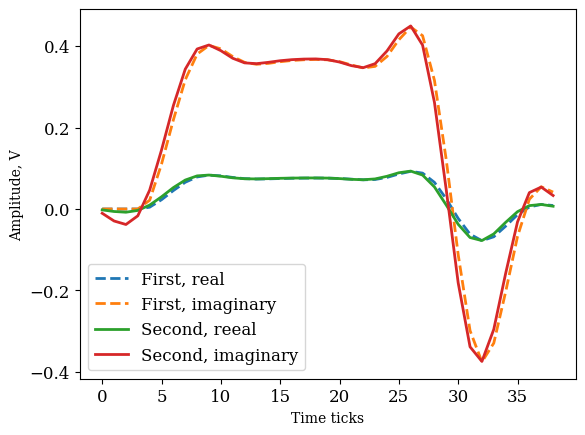

In [10]:
# Shift and scale the basis vector x
x = iqdata[540]#[920]
y = iqdata[919]#[793]

err, b0, shift = find_lsq_shift_exhaust(x, y, 6)
print('Scale =', b0, 'Shift =', shift)
print('Before shift')
plt_compare_vec(x, y)
print('After shift')
plt_compare_vec(b0 * shift_x(x, shift), y)

Over the dataset of noise the std =  0.13894952109355102 mean =  (0.0007430863428147125+2.7893496267627772e-06j)
PDF of the cluster signals with respect to the noise std


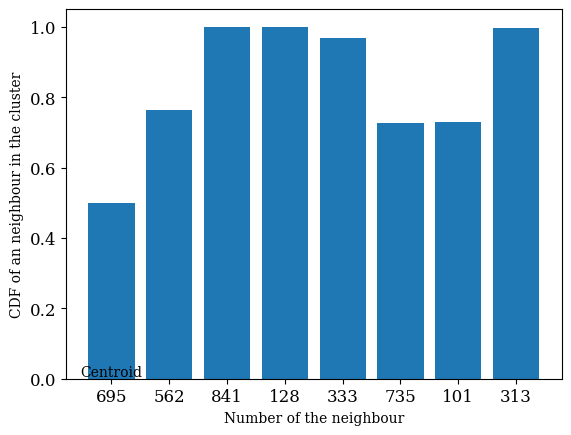

MSE of the signal to to centroid approximation


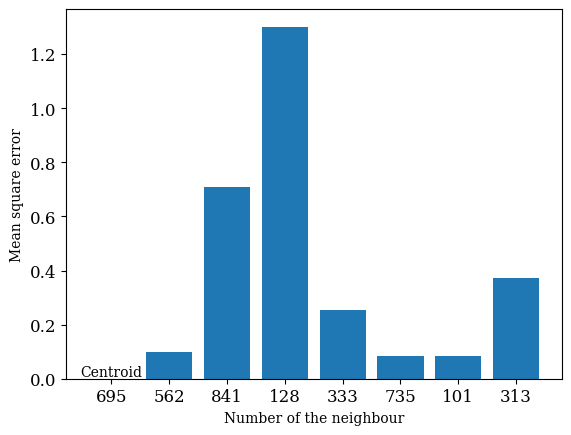

The signals belong to the cluster


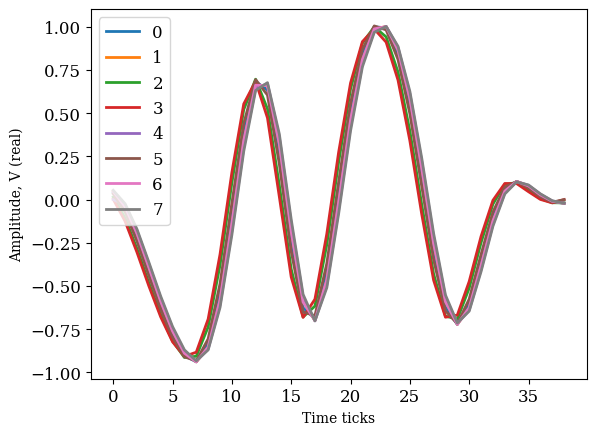

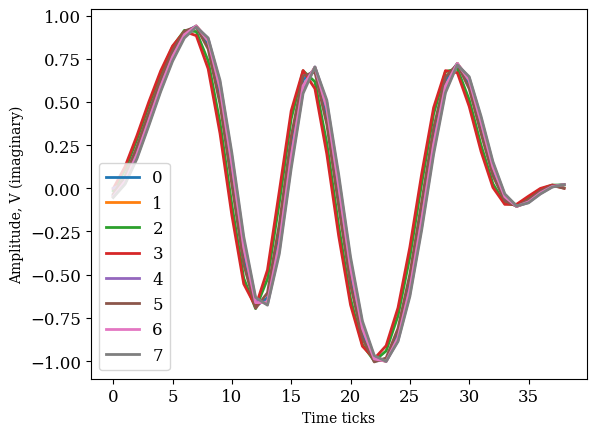

The original signals of this cluster


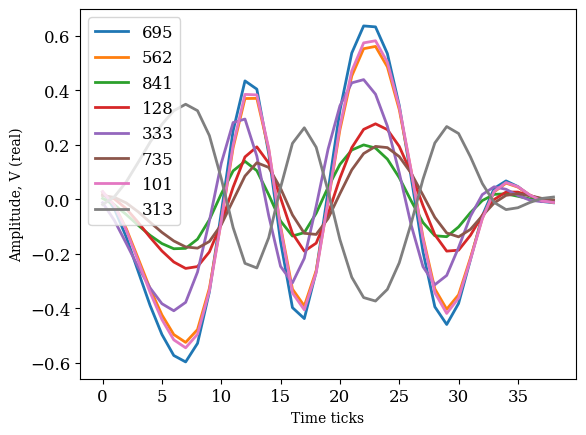

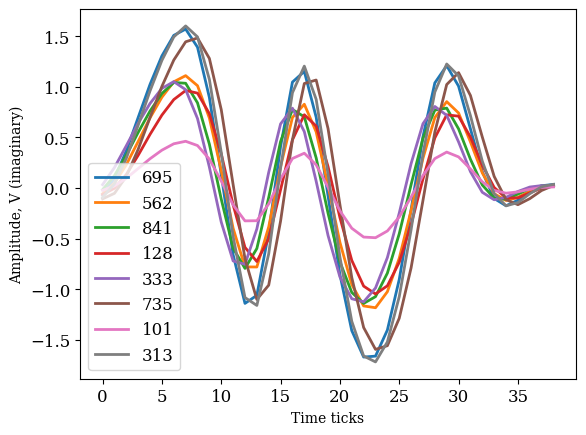

In [11]:
# Compute the diameters of the cluster without noise
# The noise is normally distributed
from scipy.stats import norm
# Note that the noise added not after scaling (0.3 to 1.1 V amplitude of iqdata)
idx = [695, 562, 841, 128, 333, 735, 101, 313]#, 645] # This one appears to be out of the cluster!
cluster = np.empty((len(idx), len(iqdata[0])), dtype=complex)
clu_err = np.empty(len(idx))
clus_pr = np.empty(len(idx))

centroid = scale_x2max(iqdata[idx[0]])
# Fill the cluster
cluster[0] = centroid # Keep the centroid the first item in the cluster

# For the pdf compute the standard deviation
avg_std = np.mean([np.std(iqnoise[i]) for i in range(len(iqnoise))])
avg_mean = np.mean([np.mean(iqnoise[i]) for i in range(len(iqnoise))]) # hehe
print('Over the dataset of noise the std = ', avg_std, 'mean = ', avg_mean)
avg_mean = 0 # According to the prior assumptions

for i in range(0, len(idx)):
  err, b0, shift = find_lsq_shift_exhaust(iqdata[idx[i]], centroid, 10) # Centroid takes the second place!
  cluster[i] = b0 * shift_x(iqdata[idx[i]], shift) # Plot it with adnd without shift
  clus_pr[i] = norm.cdf(err, loc = avg_mean, scale = avg_std)
  clu_err[i] = err

# Plot different variants of neighbors in the cluster
print('PDF of the cluster signals with respect to the noise std')
plt.bar(list(map(str, idx)), clus_pr)
plt.text(list(map(str, idx))[0], 0, 'Centroid', horizontalalignment='center', verticalalignment='bottom')
plt.xlabel('Number of the neighbour', fontname='DejaVu Serif')
plt.ylabel('CDF of an neighbour in the cluster', fontname='DejaVu Serif')
plt.show()

print('MSE of the signal to to centroid approximation')
plt.bar(list(map(str, idx)),clu_err)
plt.text(list(map(str, idx))[0], 0, 'Centroid', horizontalalignment='center', verticalalignment='bottom')
plt.xlabel('Number of the neighbour', fontname='DejaVu Serif')
plt.ylabel('Mean square error', fontname='DejaVu Serif')
plt.show()

print('The signals belong to the cluster')
plt_cluster(cluster, range(len(idx)))
print('The original signals of this cluster')
plt_cluster(iqdata, idx) # Sampe plot but not scaled and shifted

An example of centroid, the red dashed line


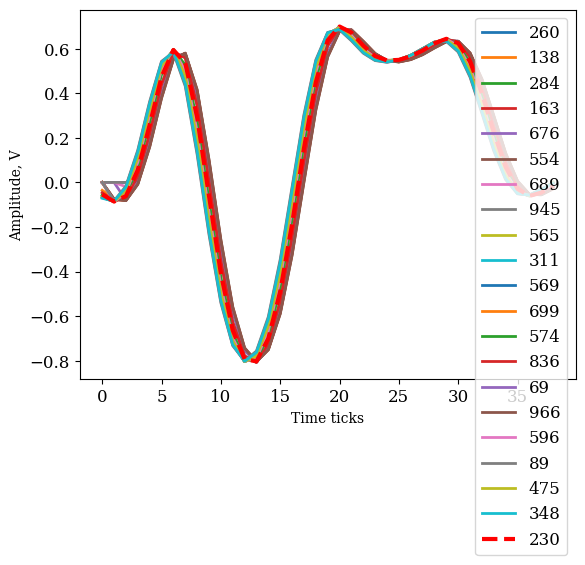

In [12]:
# Show a possible centroid
idx_cluster = [260, 138, 284, 163, 676, 554, 689, 945, 565, 311, 569, 699, 574, 836, 69, 966, 596, 89, 475, 348, 230]
#idx_cluster = [195, 612, 133, 325, 40, 136, 733, 171, 844, 936, 494, 463, 439, 88, 985, 955, 189, 734]
for idx_i, i in zip(idx_cluster, range(len(idx_cluster))):
  centroid = iqdata[idx_cluster[20]] # or 171
  # x = scale_x2max(iqdata[idx_i])
  x = iqdata[idx_i]
  err, b0, shift = find_lsq_shift_exhaust(x, centroid, 10)
  x1 = b0 * shift_x(x, shift)
  if i == 20:
    plt.plot(x.real, label = idx_cluster[i],  c='r',linewidth=3.0, linestyle='dashed')
  else:
    #plt.plot(x.real, label = idx_cluster[i])
    plt.plot(x1.real, label = idx_cluster[i])
plt.xlabel('Time ticks', fontname='DejaVu Serif')
plt.ylabel('Amplitude, V', fontname='DejaVu Serif')
plt.legend()
print('An example of centroid, the red dashed line')
plt.show()


Analyze a centroid (39,) and its cluster (8, 39)
The cluster std diameter without noise is (0.05925040680294422+0.05925040680294422j)
The cluster max-min diameter without noise is (0.16051559926541295-0.16051559926541295j)


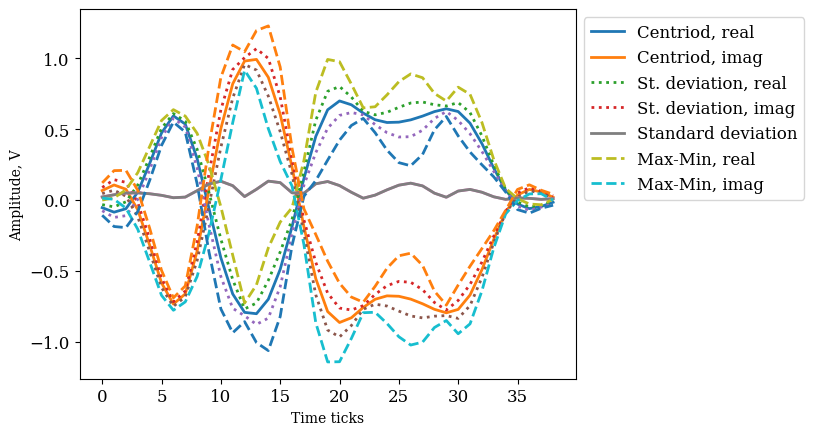

In [13]:
# Visualize the diameters of the cluster
# Plot std and max-min of the cluster around the centroid
print('Analyze a centroid', centroid.shape, 'and its cluster', cluster.shape)

std = np.std(cluster.real, axis=0, ddof=1, dtype=complex)
std.imag = np.std(cluster.imag, axis=0, ddof=1)
print('The cluster std diameter without noise is', np.mean(std))

plt.plot(centroid.real, label = 'Centriod, real')
plt.plot(centroid.imag, label = 'Centriod, imag')
plt.plot(centroid.real+std.real, label = 'St. deviation, real', linestyle='dotted')
plt.plot(centroid.imag+std.imag, label = 'St. deviation, imag', linestyle='dotted')
plt.plot(centroid.real-std.real, linestyle='dotted')
plt.plot(centroid.imag-std.imag, linestyle='dotted')
plt.plot(std.real)
plt.plot(std.imag, label = 'Standard deviation') # Surprizingly the same, check it
plt.xlabel('Time ticks', fontname='DejaVu Serif')
plt.ylabel('Amplitude, V', fontname='DejaVu Serif')
# ... continiue to plot
# Maximum distance in the cluster: criterion that the item is out of the cluster
cluster_min = np.min(cluster, axis=0)
cluster_max = np.max(cluster, axis=0)
cluster_rad = cluster_max - cluster_min
print('The cluster max-min diameter without noise is', np.mean(cluster_rad))
# print(cluster_min)
# print(cluster_max)
# print(cluster_rad)
plt.plot(centroid.real+cluster_rad.real, label='Max-Min, real', linestyle='dashed')
plt.plot(centroid.imag+cluster_rad.imag, label='Max-Min, imag', linestyle='dashed')
plt.plot(centroid.real-cluster_rad.real, linestyle='dashed')
plt.plot(centroid.imag-cluster_rad.imag, linestyle='dashed')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#print(np.sum(cluster.real, axis=0))
#print(np.sum(cluster.imag, axis=0))

{256, 322, 453, 329, 496, 848, 370, 148, 340, 312, 478}


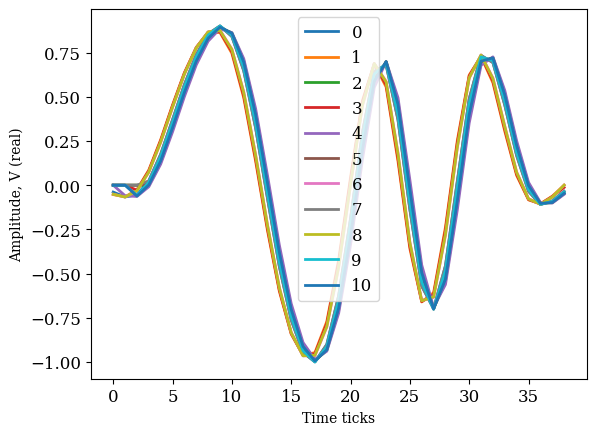

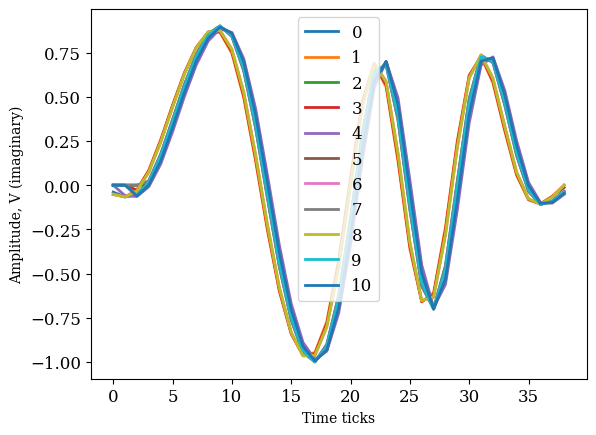

{1, 834, 97, 835, 296, 201, 968, 724, 149, 213, 981, 824, 539}


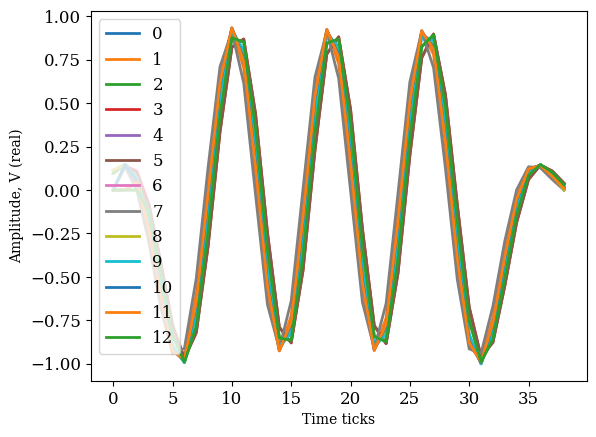

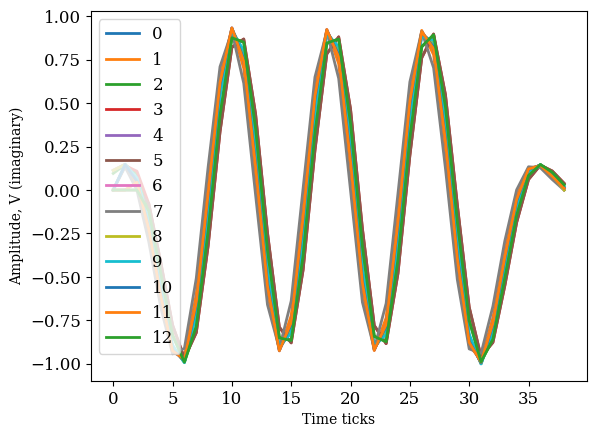

{704, 705, 644, 648, 585, 298, 362, 620, 808, 111, 310, 56, 218, 446}


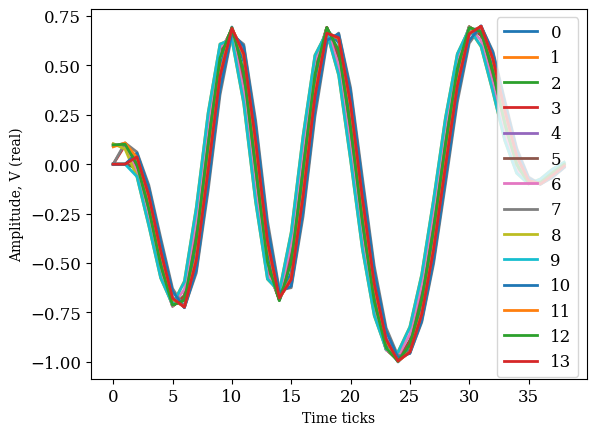

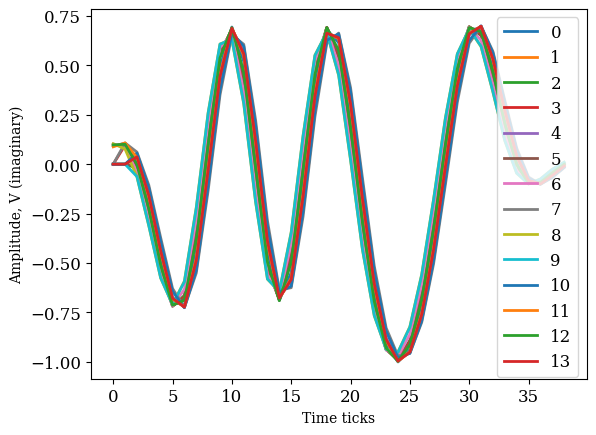

In [14]:
# Clustering procedure
# It is preliminary since the clustering is a multi-extreme problem
# Get in the cluster the items with parameters lesser than
ERR_MAX = 2.5
SHIFT_MAX = 12 #5
idx_current = set(range(len(iqdata))) # np.arange(0, len(iqdata)-1)
idx_cluster_collection = set()

import random
# While the idx_current is not empty
demo_count = 0
while idx_current: #.size > 0:
  idx_centroid = random.choice(list(idx_current)) # np.random.choice(idx_current)
  idx_current.remove(idx_centroid)
  # idx_current = np.delete(idx_current, np.where(idx_current == idx_centroid))
  idx_cluster = set()
  idx_cluster.add(idx_centroid)
  # print(idx_centroid)
  centroid = scale_x2max(iqdata[idx_centroid])
  # plt_compare_vec(centroid, centroid)
  # Create an exmpty cluster to fulfill
  cluster = np.empty((0, len(iqdata[0])), dtype=complex)
  cluster = np.vstack((cluster, centroid))
  # plt_cluster(cluster, list(range(len(cluster))))
  # Fill the cluster
  # idx_current__ = idx_current

  # Fill the cluster with neighbors
  idx_current__ = idx_current.copy()
  for i in idx_current__:
    # err, b0, shift = find_lsq_shift(iqdata[i], centroid, SHIFT_MAX) # Variant 1
    err, b0, shift = find_lsq_shift_exhaust(iqdata[i], centroid, SHIFT_MAX) # Variant 2
    if err < ERR_MAX:
      cluster = np.vstack((cluster, b0 * shift_x(iqdata[i], shift)))
      # idx_cluster = np.append(idx_cluster, i)
      idx_cluster.add(i)
      # print(i)
      idx_current.remove(i)
      # idx_current = np.delete(idx_current, np.where(idx_current == i))
  idx_cluster_collection.add(tuple(idx_cluster))
  # Keep it simple for the  demo version
  demo_count += 1
  if demo_count <= DEMO_PLTn:
    print(idx_cluster)
    plt_cluster(cluster, list(range(len(cluster))))

In [15]:
# Find the centroids of the new cluster set
SHIFT_MAX = 15
idx_centroid_collection = set()

for idx_cluster in idx_cluster_collection:
  new_cluster = np.empty((0, len(iqdata[0])), dtype=complex)
  distances = np.inf*np.ones((len(idx_cluster),len(idx_cluster)))
  for idx_i, i in zip(idx_cluster, range(len(idx_cluster))):
    for idx_j, j in zip(idx_cluster, range(len(idx_cluster))):
      x = iqdata[idx_i]
      y = iqdata[idx_j]
      err, b0, shift = find_lsq_shift_exhaust(x, y, SHIFT_MAX)
      distances[i,j] = err
  dist2all = np.median(distances, axis=0)
  idx_friendly = idx_cluster[np.argsort(dist2all)[0]]
  idx_centroid_collection.add(idx_friendly)
  # print('Centroid index', idx_friendly, 'loadl index', i, 'distances', dist2all)
  # plt.imshow(distances, cmap="viridis", interpolation="nearest")
  # plt.show()
  # plt_cluster(iqdata[list(idx_cluster)], list(range(len(idx_cluster))))
  # break
print('The number of centroids', len(idx_centroid_collection))
print(idx_centroid_collection)

The number of centroids 65
{385, 514, 769, 5, 903, 648, 522, 652, 12, 914, 918, 919, 536, 792, 408, 28, 796, 158, 160, 929, 288, 291, 40, 296, 41, 173, 686, 689, 828, 956, 445, 962, 324, 327, 457, 970, 843, 588, 458, 974, 595, 852, 469, 342, 984, 217, 601, 731, 859, 354, 483, 484, 360, 617, 877, 109, 496, 499, 115, 117, 629, 761, 891, 380, 639}


In [16]:
# Refine the collection of clusters
# The centroid is the average of the clusters in phase, so its span is wider
# Another reason is that there are still two parameters:
# maximum distance for clustering and
# maximum shift before scaling and computing distance

# print(idx_centroid_collection)
# print(idx_cluster_collection)
new_idx_cluster_collection = set()
idx_current = set(range(len(iqdata)))
idx_deleted_centroids = set()

demo_count = 0
for idx_centroid in idx_centroid_collection:
  # print(idx_centroid)
  if idx_centroid in idx_deleted_centroids:
    continue
  idx_current.remove(idx_centroid)
  idx_cluster = set()
  idx_cluster.add(idx_centroid)

  centroid = scale_x2max(iqdata[idx_centroid])
  # Create an exmpty cluster to fulfill
  cluster = np.empty((0, len(iqdata[0])), dtype=complex)
  cluster = np.vstack((cluster, centroid))
  idx_current__ = idx_current.copy()
  for i in idx_current__:
    err, b0, shift = find_lsq_shift_exhaust(iqdata[i], centroid, SHIFT_MAX)
    if err < ERR_MAX:
      cluster = np.vstack((cluster, b0 * shift_x(iqdata[i], shift)))
      idx_cluster.add(i)
      idx_current.remove(i)
      if i in idx_centroid_collection:
        idx_deleted_centroids.add(i) # Mark this centroid as deleted with its index
  new_idx_cluster_collection.add(tuple(idx_cluster))
  # Keep it simple for the  demo version
  demo_count += 1
  if demo_count <= DEMO_PLTn:
    print(idx_cluster)
    # plt_cluster(cluster, list(range(len(cluster))))

# print(idx_deleted_centroids)
# print(new_idx_cluster_collection)
# Store the results
# with open("idx_cluster_collection.json", "w") as file:
#    json.dump(list(new_idx_cluster_collection), file)

print('Number of new clusters:', len(new_idx_cluster_collection))
print('Number of deleted centroids:', len(idx_deleted_centroids))
print('Number of centroids:', len(idx_centroid_collection))

{385, 738, 840, 112, 146, 530, 831}
{514, 645, 775, 264, 265, 393, 520, 791, 413, 286, 543, 38, 294, 309, 949, 316, 318, 726, 987, 997, 511}
{128, 769, 803, 101, 841, 524, 333, 465, 497, 562, 979, 502, 695, 313, 858, 735}
Number of new clusters: 65
Number of deleted centroids: 0
Number of centroids: 65


Cluster 0 indices [ 47  56  75 105 140 141 298 341 367 423 516 548 580 585 646 719 816 826
 869 925 962]


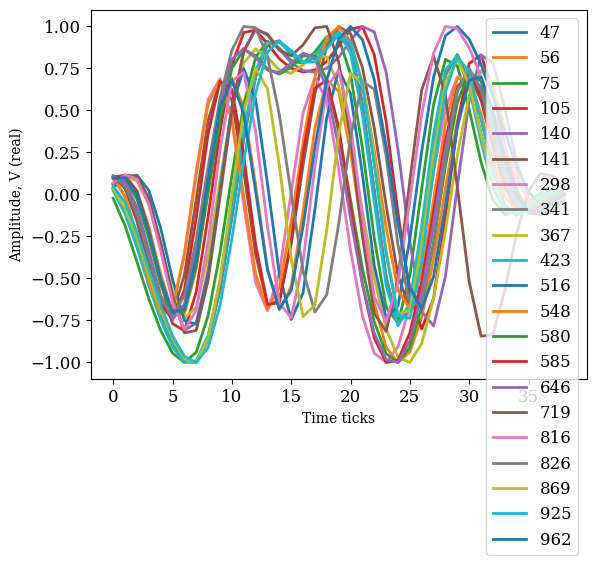

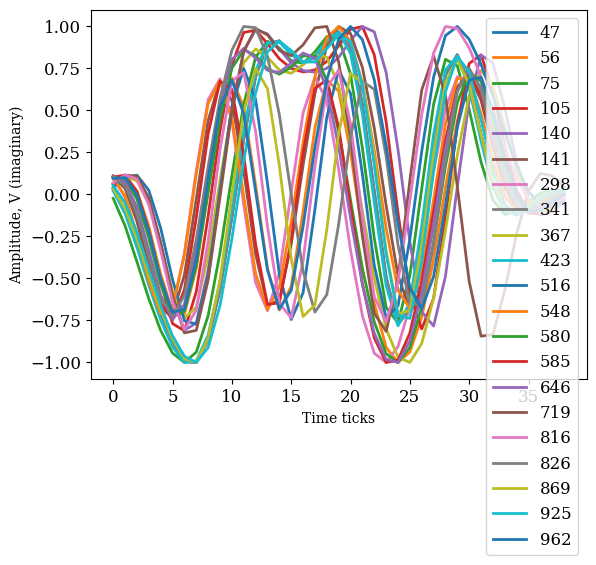

Cluster 1 indices [ 25  67  78 238 267 292 325 358 444 463 484 517 566 586 607 664 709 733]


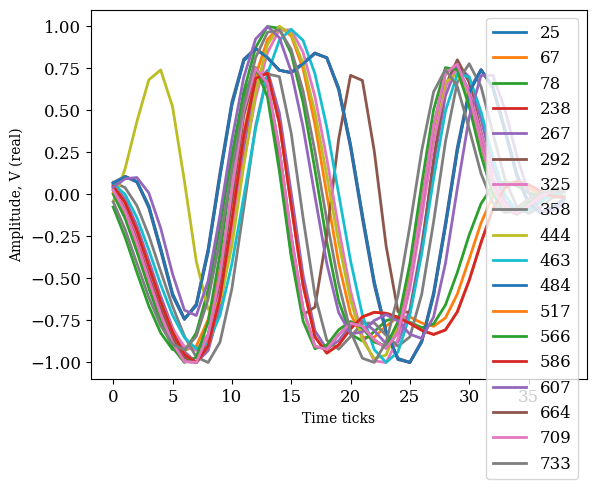

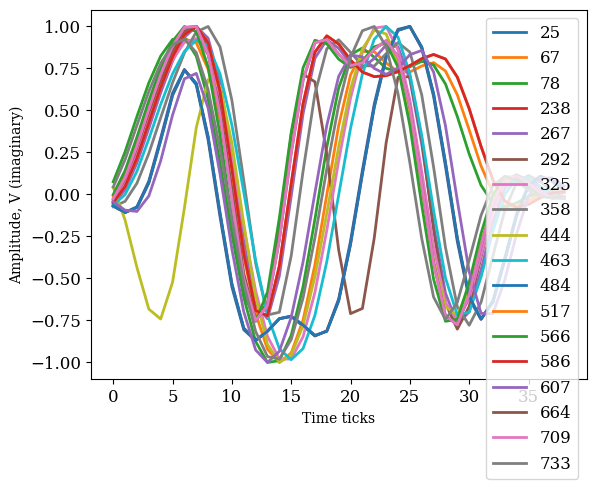

Cluster 2 indices [ 74 107 167 203 208 381 394 404 432 531 592 667 725 727 750 773 793 895
 920 924 935]


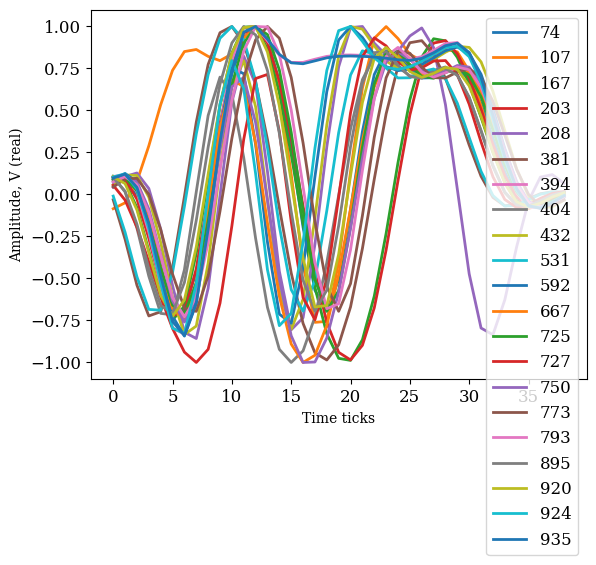

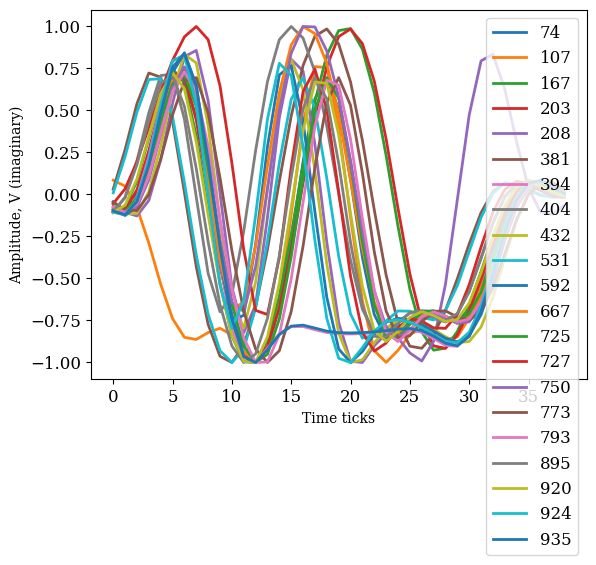

In [17]:
# k-Means clusteing from the sklearn into 128 clusters
Xcluster = np.empty((0, 2*len(iqdata[0])))
iq_scaled = np.empty(iqdata.shape, dtype=complex)
for i in range(len(iqdata)):
  scale = scale_x2max(iqdata[i])
  # stack the real and imag as a single row in the set
  Xcluster = np.vstack((Xcluster, np.concatenate((scale.real, scale.imag), axis=0)))
  iq_scaled[i] = scale

# Try k-means but do not use it (the above approach prevails)
total_clusters = 64
# Templete for the library of centroids
iqdata_lib_kMeans = np.empty((total_clusters, len(iqdata[0])), dtype=complex)

# The clustering procedure
kmeans = KMeans(n_clusters=total_clusters, random_state=0, n_init="auto").fit(Xcluster)
labels = kmeans.labels_
# print(labels)

# Extract centroids from the kMeans clustering
# Find the centroid in the cluster
def find_centroid(cluster):
  # The centroid in the cluster is the nearest to the all
  n = len(cluster)
  dist = np.empty((n, n)) # Make the (n,n)-pairwise distance matrix
  for x, i in zip(cluster, range(n)):
    for y, j in zip(cluster, range(n)):
      dist[i, j] = np.linalg.norm(x - y) # Works with complex vector
  # Sort the distances
  id = np.argsort(
      np.sum(dist, axis=0))
  return cluster[id[0]] # is centroid
#centroid = find_centroid(cluster)
#plt_cluster(cluster, range(len(cluster)))

demo_count = 0
for i in range(total_clusters):
  idx = np.where(labels == i)[0]

  centroid = find_centroid(iq_scaled[idx])
  # Append a centroid to the library
  iqdata_lib_kMeans[i] = centroid
  demo_count += 1
  if demo_count <= DEMO_PLTn:
    print('Cluster', i, 'indices', idx)
    plt_cluster(iq_scaled, idx)